In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\survey_data (1).csv.crdownload")
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [8]:
import sqlite3
conn = sqlite3.connect('survey-data.sqlite')

In [10]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0      2892


In [12]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


In [14]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old    473
1     25-34 years old    955
2     35-44 years old    762
3     45-54 years old    368
4     55-64 years old    163
5   65 years or older     58
6   Prefer not to say     21
7  Under 18 years old     92


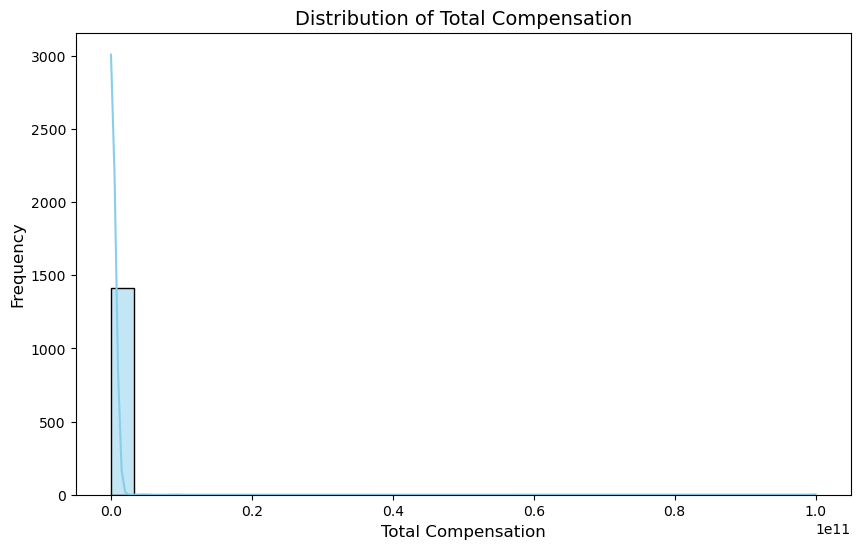

In [16]:
# Remove missing values
filtered_data = data["CompTotal"].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data, bins=30, kde=True, color="skyblue")

# Labels and Title
plt.xlabel("Total Compensation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Total Compensation", fontsize=14)

# Show the plot
plt.show()

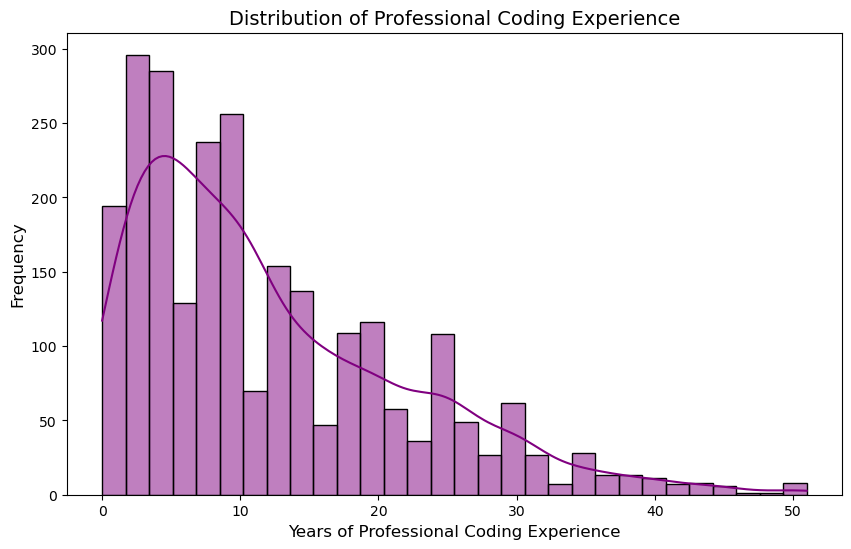

In [18]:
# Convert "YearsCodePro" to numeric, handling non-numeric values
data["YearsCodePro"] = data["YearsCodePro"].replace({"Less than 1 year": 0, "More than 50 years": 51}).astype(float)

# Drop missing values
filtered_data = data["YearsCodePro"].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data, bins=30, kde=True, color="purple")

# Labels and Title
plt.xlabel("Years of Professional Coding Experience", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Professional Coding Experience", fontsize=14)

# Show the plot
plt.show()

In [22]:
# Convert 'Age' to numeric, forcing errors to NaN (to handle any non-numeric values)
data["Age"] = pd.to_numeric(data["Age"], errors="coerce")

# Drop rows where Age is NaN after conversion
data = data.dropna(subset=["Age"])

In [ ]:
# Define age bins
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66-75"]
data["AgeGroup"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

# Drop missing values for Compensation and AgeGroup
filtered_data = data.dropna(subset=["CompTotal", "AgeGroup"])

# Plot histograms for different age groups
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x="CompTotal", hue="AgeGroup", bins=30, kde=True, palette="Set2")

# Labels and Title
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Total Compensation (Log Scale)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Comparison of Compensation Distribution Across Age Groups", fontsize=14)
plt.legend(title="Age Group")

# Show plot
plt.show()

In [ ]:
# Convert 'Age' and 'TimeSearching' to numeric, forcing errors to NaN
data["Age"] = pd.to_numeric(data["Age"], errors="coerce")
data["TimeSearching"] = pd.to_numeric(data["TimeSearching"], errors="coerce")

# Drop rows where Age or TimeSearching is NaN after conversion
data = data.dropna(subset=["Age", "TimeSearching"])

# Define age bins and labels
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66-75"]
data["AgeGroup"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

# Drop rows where AgeGroup is NaN
filtered_data = data.dropna(subset=["AgeGroup"])

# Plot histograms for different age groups
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x="TimeSearching", hue="AgeGroup", bins=30, kde=True, palette="viridis")

# Labels and Title
plt.xlabel("Time Spent Searching for Information (Hours)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Time Spent Searching Across Age Groups", fontsize=14)
plt.legend(title="Age Group")
plt.show()

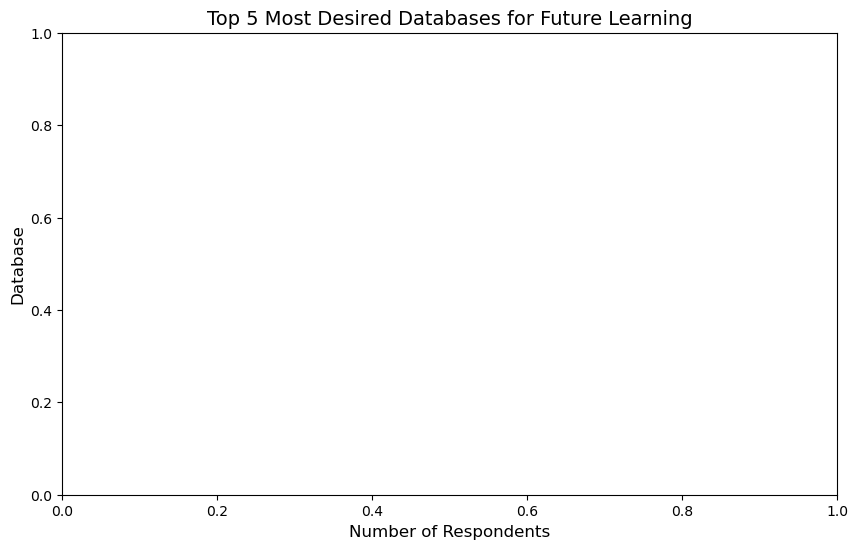

In [30]:
# Assuming 'DatabaseWantToWorkWith' contains comma-separated values
# Split and explode the database choices into separate rows
data["DatabaseWantToWorkWith"] = data["DatabaseWantToWorkWith"].astype(str)
db_exploded = data["DatabaseWantToWorkWith"].str.split(";").explode()

# Count the occurrences of each database and select the top 5
top_5_databases = db_exploded.value_counts().nlargest(5)

# Plot histogram (bar chart) of the top 5 databases
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_databases.values, y=top_5_databases.index, palette="Blues_r")

# Labels and Title
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Database", fontsize=12)
plt.title("Top 5 Most Desired Databases for Future Learning", fontsize=14)
plt.show()

In [ ]:
# Ensure the column is of string type
data["WorkArrangement"] = data["WorkArrangement"].astype(str)

# Count occurrences of each work arrangement type
work_arrangement_counts = data["WorkArrangement"].value_counts()

# Plot a histogram (bar chart) of work arrangements
plt.figure(figsize=(10, 6))
sns.barplot(x=work_arrangement_counts.values, y=work_arrangement_counts.index, palette="coolwarm")

# Labels and Title
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Work Arrangement", fontsize=12)
plt.title("Distribution of Preferred Work Arrangements", fontsize=14)

# Show plot
plt.show()

In [ ]:
# Ensure YearsCodePro is numeric (convert non-numeric values)
data["YearsCodePro"] = pd.to_numeric(data["YearsCodePro"], errors="coerce")

# Drop NaN values from relevant columns
data_filtered = data.dropna(subset=["YearsCodePro", "JobSat"])

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=data_filtered, x="YearsCodePro", hue="JobSat", multiple="stack", bins=20, palette="coolwarm")

# Labels and Title
plt.xlabel("Years of Professional Coding Experience", fontsize=12)
plt.ylabel("Count of Respondents", fontsize=12)
plt.title("Histogram of Job Satisfaction Based on Years of Professional Coding Experience", fontsize=14)

# Show plot
plt.show()

In [36]:
conn.close()